## Business Understanding 


1. **ID:** Unique number to represent patient ID.  It is crucial for tracking and referencing individual patient records.

2. **PRG:** Plasma glucose.Plasma glucose levels are an important indicator of a patient's blood sugar levels. Abnormal glucose levels may be associated with conditions such as diabetes, which can have implications for overall health.

3. **PL:** Blood Work Result-1 (mu U/ml).This could represent the measurement of a specific biomarker or substance in the blood, potentially related to organ function, hormonal levels, or other health indicators.

4. **PR:** Blood Pressure (mm Hg).Blood pressure is a vital sign that provides information about the force of blood against the walls of the arteries. Abnormal blood pressure levels can indicate cardiovascular health issues.

5. **SK:** Blood Work Result-2 (mm).Similar to Blood Work Result-1, this could represent the measurement of a specific parameter in the blood, which may be relevant to various physiological functions.

6. **TS:** Blood Work Result-3 (mu U/ml). Similar to Blood Work Result-1 and Blood Work Result-2, this represents the measurement of a specific substance in the blood, potentially associated with different health factors.

7. **M11:**  Body mass index (weight in kg/(height in m)^2).BMI is a measure of body fat based on weight and height. It is often used to assess whether an individual is underweight, normal weight, overweight, or obese.

8. **BD2:** Blood Work Result-4 (mu U/ml).Similar to other blood work results, this represents the measurement of a specific biomarker or substance in the blood.

9. **Age:** patients age (years).Age is a fundamental demographic factor that can influence various health conditions and their management.
10. **Insurance:** If a patient holds a valid insurance card. The insurance provides information about whether patients have insurance coverage, which can impact access to healthcare services and the financial aspects of medical care.

11. **Sepsis:** TPositive: if a patient in ICU will develop a sepsis , and Negative: otherwise. Sepsis is a potentially life-threatening condition caused by the body's response to infection. This indicates whether a patient in the intensive care unit (ICU) is predicted to develop sepsis or not based on certain criteria.



Goal: To bulid a machine learning model to predict if a patients  will  develop a sepsis or not in the ICU.

Alternative Hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.

Null Hypothesis: There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.

Analytical Questions:
1. Is there a relationship between plasma glucose levels and the development of sepsis?
2. What factors are associated with higher blood pressure in the ICU setting?
3. Are there specific factors (e.g., blood work results, BMI, age) associated with the development of sepsis?
4. What is the correlation between plasma glucose levels and other clinical variables in the dataset?
5. How many patients in the dataset developed sepsis, and how many did not?


## Data Understanding

In [1]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


#### Load dataset

In [3]:
df = pd.read_csv("data/Paitients_Files_Train.csv")


In [4]:
test = pd.read_csv("data/Paitients_Files_Test.csv")


In [5]:
df

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]

In [6]:
test

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0    ICU200609    1  109  38  18  120  23.1  0.407   26          1
1    ICU200610    1  108  88  19    0  27.1  0.400   24          1
2    ICU200611    6   96   0   0    0  23.7  0.190   28          1
3    ICU200612    1  124  74  36    0  27.8  0.100   30          1
4    ICU200613    7  150  78  29  126  35.2  0.692   54          0
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...
164  ICU200773   10  101  76  48  180  32.9  0.171   63          1
165  ICU200774    2  122  70  27    0  36.8  0.340   27          1
166  ICU200775    5  121  72  23  112  26.2  0.245   30          1
167  ICU200776    1  126  60   0    0  30.1  0.349   47          1
168  ICU200777    1   93  70  31    0  30.4  0.315   23          1

[169 rows x 10 columns]

In [7]:
df['Sepssis'].unique()

array(['Positive', 'Negative'], dtype=object)

In [8]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64],
      dtype=int64)

In [9]:
df['Insurance'].unique()

array([0, 1], dtype=int64)

#### EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [15]:
test.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [16]:
df.describe().T

count        mean         std     min     25%      50%      75%  \
PRG        599.0    3.824708    3.362839   0.000   1.000    3.000    6.000   
PL         599.0  120.153589   32.682364   0.000  99.000  116.000  140.000   
PR         599.0   68.732888   19.335675   0.000  64.000   70.000   80.000   
SK         599.0   20.562604   16.017622   0.000   0.000   23.000   32.000   
TS         599.0   79.460768  116.576176   0.000   0.000   36.000  123.500   
M11        599.0   31.920033    8.008227   0.000  27.100   32.000   36.550   
BD2        599.0    0.481187    0.337552   0.078   0.248    0.383    0.647   
Age        599.0   33.290484   11.828446  21.000  24.000   29.000   40.000   
Insurance  599.0    0.686144    0.464447   0.000   0.000    1.000    1.000   

              max  
PRG         17.00  
PL         198.00  
PR         122.00  
SK          99.00  
TS         846.00  
M11         67.10  
BD2          2.42  
Age         81.00  
Insurance    1.00

#### Univariate Analysis 

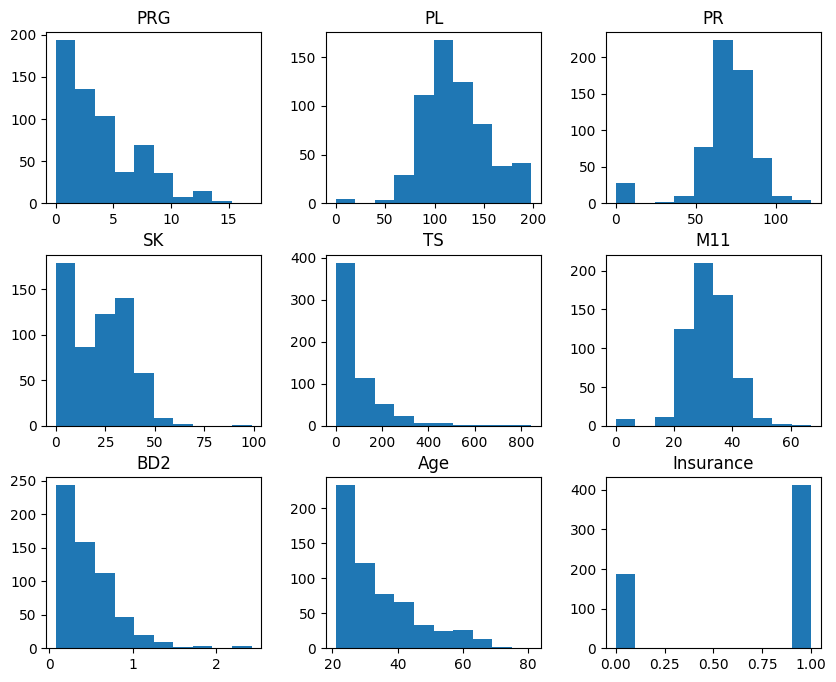

In [18]:
df.hist(figsize=(10,8),grid=False)
plt.show()

the insurance plot shows that the number of patience that insurace is higher than those with no insurance for treatment. the age plot also show a right the BD2, age and ts are positive skewed 

<Axes: >

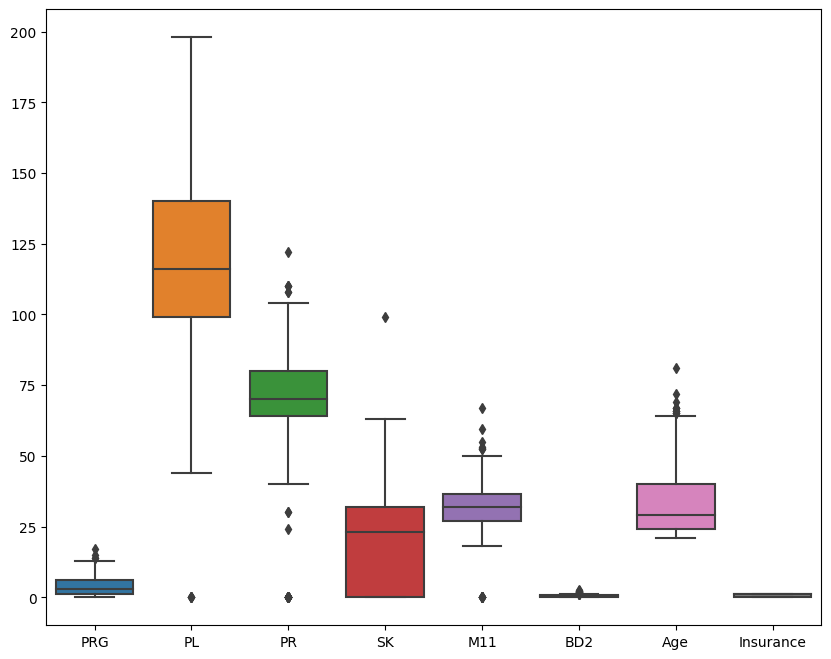

In [19]:
df_without_TS= df.drop(['TS'], axis=1)
plt.figure(figsize=(10,8))
sns.boxplot(data=df_without_TS)

The Outliers of PRG, BD2 shows that they may highlight exceptional cases that require special attention or investigation, the SK and age shows that if there are underlying factors contributing to these extreme values of outliers.The outliers for PR,SK,M11,showus there is outliers is not too far awy from them. 

<Axes: >

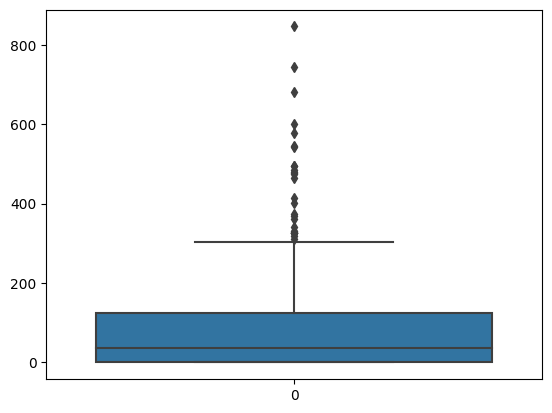

In [19]:
sns.boxplot(data=df['TS'])

Bivariate analysis 

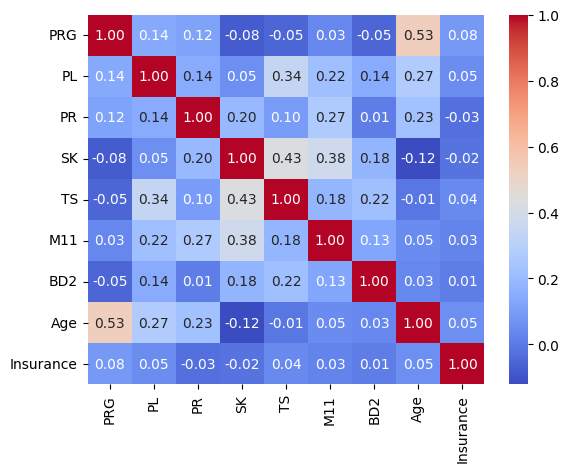

In [20]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()


the warmer colors (shades of red) indicate positive correlations, while cooler colors (shades of blue) indicate negative correlations. The  positive correlations indicate that as one variable increases, the other tends to increase as well.
Mention that correlation values closer to 1 represent a stronger positive relationship.the values closer to 0 or -0 indicate weaker correlations.

#### multivariate 

In [21]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

<Figure size 800x800 with 0 Axes>

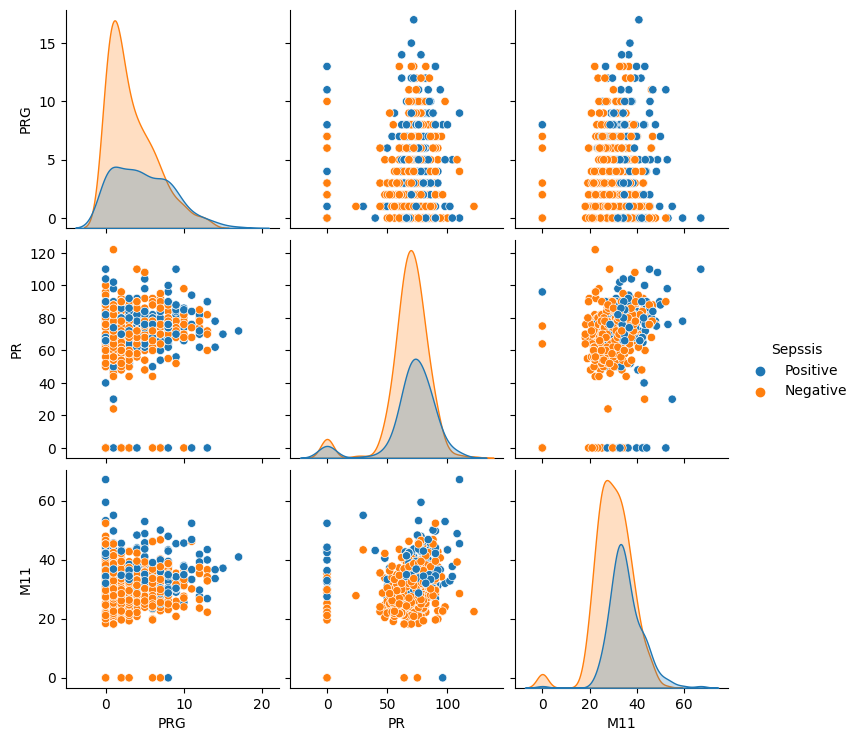

In [21]:
data= df[['Sepssis','PRG','PR','M11']]
plt.figure(figsize=(8,8))
sns.pairplot(data,hue='Sepssis')


we use spessis as the shewed

#### Analytical Questions:
1. Is there a relationship between plasma glucose levels and the development of sepsis?
2. What factors are associated with higher blood pressure in the ICU setting?
3. Are there specific factors (e.g., blood work results, BMI, age) associated with the development of sepsis?
4. What is the correlation between plasma glucose levels and other clinical variables in the dataset?
5. How many patients in the dataset developed sepsis, and how many did not?

1. Is there a relationship between plasma glucose levels and the development of sepsis?

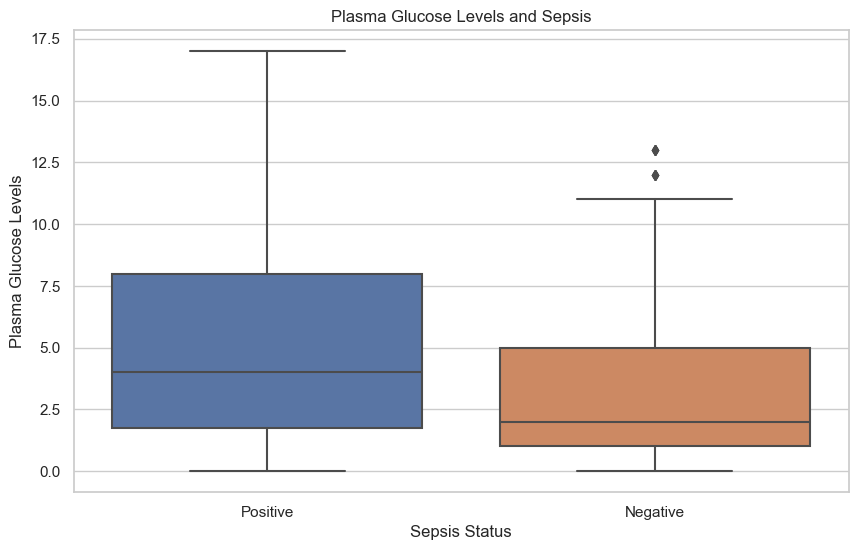

In [23]:
# Filter data for patients with and without sepsis
sepsis_data = df[df['Sepssis'] == 'TPositive']
no_sepsis_data = df[df['Sepssis'] == 'Negative']

# Create a boxplot or violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Sepssis', y='PRG', data=df)
plt.title('Plasma Glucose Levels and Sepsis')
plt.xlabel('Sepsis Status')
plt.ylabel('Plasma Glucose Levels')
# Show the plot
plt.show()

The outliers is on the negative side may represent patients with exceptionally low plasma glucose levels.
These low values could be due to various reasons such as unique medical conditions, or specific patient characteristics.

2. What factors are associated with higher blood pressure in the ICU setting?

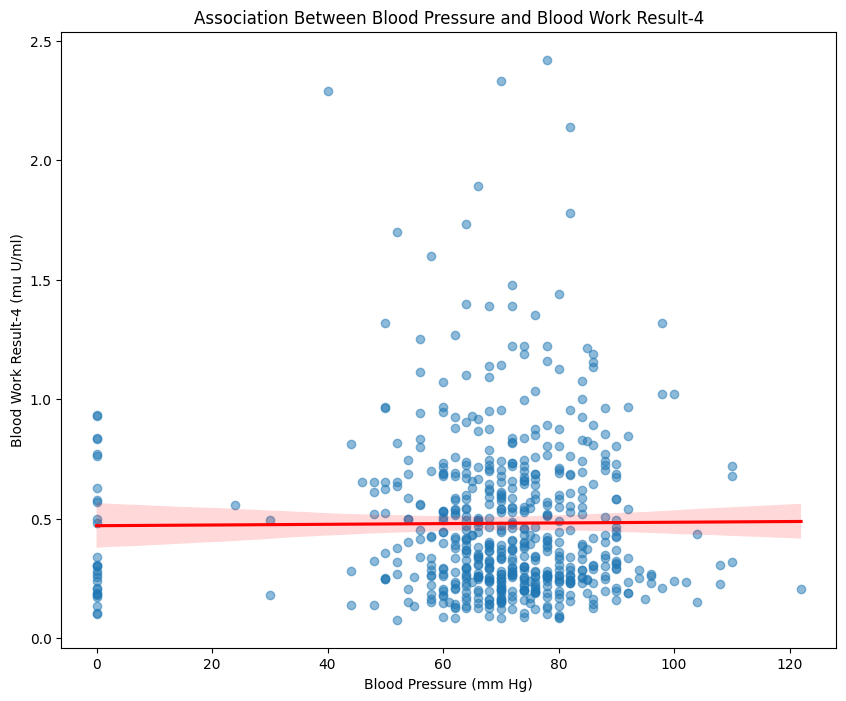

In [22]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot with regression line
sns.regplot(x='PR', y='BD2', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Association Between Blood Pressure and Blood Work Result-4')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Blood Work Result-4 (mu U/ml)')


# Show the plot
plt.show()

The red regression line is fitted to the data points using a regression algorithm. It provides an approximation of the overall trend or relationship between blood pressure and Blood Work Result-4. since the line is nearly flat, it indicates a weak or no correlation between the blood pressure and blood work result-4. since there is a  tightly clustered, it suggests a strong correlation.

3. Are there specific factors (e.g., blood work results, BMI, age) associated with the development of sepsis?

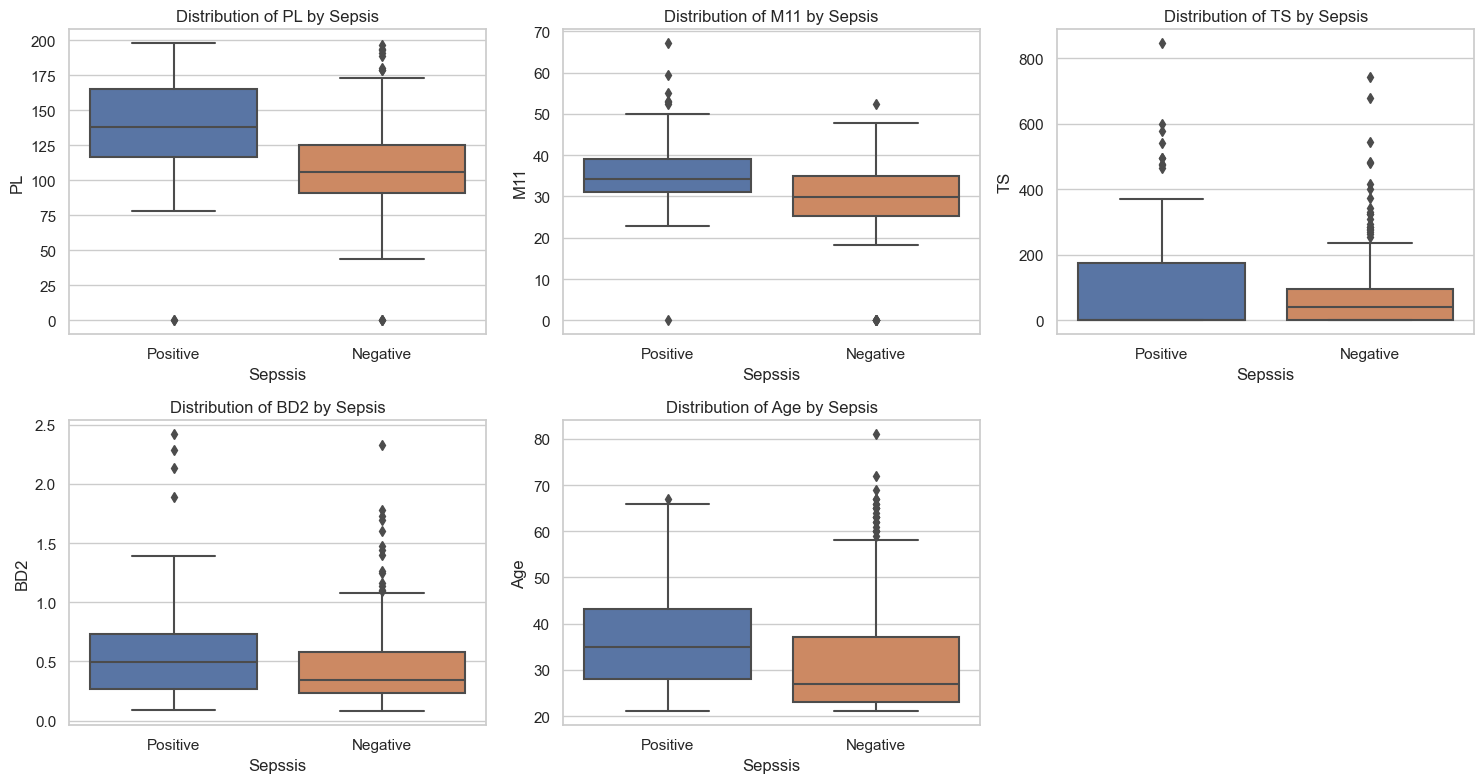

In [25]:
# Select relevant columns
factors = ['PL', 'M11', 'TS', 'BD2', 'Age']

# Create a boxplot for each factor
plt.figure(figsize=(15, 8))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Sepssis', y=factor, data=df)
    plt.title(f'Distribution of {factor} by Sepsis')

plt.tight_layout()
plt.show()

1. PL (Blood Work Result-1):

The boxplots for PL show the distribution of Blood Work Result-1 for patients with and without sepsis. there are noticeable differences in the medians and presence of outliers, on the negative, it suggest that Blood Work Result-1 is not associated with the development of sepsis.

2.  M11 (Blood Work Result-2):
The boxplots show variations in medians and spread between sepsis and non-sepsis cases.
Outliers are present in both groups, suggesting potential significance in the context of sepsis development.

3. TS (Blood Work Result-3):
Blood Work Result-3 exhibits differences in medians and spread between patients with and without sepsis.
Outliers in both groups may indicate distinct trends related to sepsis.

4. BD2 (Blood Work Result-4):
The boxplots for Blood Work Result-4 highlight differences in medians and the presence of outliers in sepsis and non-sepsis patients.
Patterns in BD2 levels may offer insights into its potential association with sepsis.

5. Clinical Implications:
The observed patterns in these factors prompt further investigation intotheir clinical implications.
Understanding how these factors contribute to sepsis risk is crucial for early detection and targeted interventions.



#### 4.How many patients in the dataset developed sepsis, and how many did not?

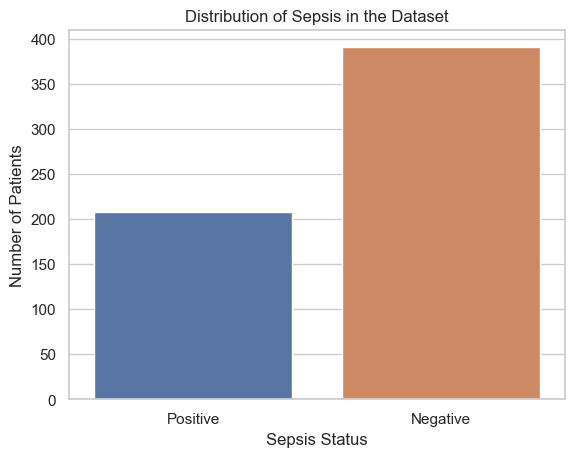

In [26]:
# Create a count plot
sns.countplot(x='Sepssis', data=df)

# Add labels and title
plt.xlabel('Sepsis Status')
plt.ylabel('Number of Patients')
plt.title('Distribution of Sepsis in the Dataset')

# Show the plot
plt.show()

From the above distribution the number of patients who develop sepsis are about 210 and does who do not develop sepsis are about 390 people 

### hypothesis

In [27]:

from scipy.stats import ttest_ind

# Example data (replace with your actual data)
sepsis_data = np.array([120, 130, 125, 140, 128, 135])
no_sepsis_data = np.array([110, 118, 115, 112, 120, 122])

# Perform two-sample t-test
t_stat, p_value = ttest_ind(sepsis_data, no_sepsis_data)

# Define significance level
alpha = 0.05

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")




T-statistic: 3.8854395618832336
P-value: 0.0030319688305704214
Reject the null hypothesis. There is a significant difference.


Since the p-value (0.0030319688305704214) is less than 0.05, so we reject the null hypothesis.
Since the null hypothesis, was rejected we can conclude that there is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.

In simpler terms, the t-test suggests that the observed difference in glucose levels between the two groups is unlikely to have occurred by chance. The rejection of the null hypothesis implies that the difference is statistically significant.


## Data Preparation

In [28]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [29]:
# lets separate the dependent and independent/target variable
X = df.drop(['Sepssis', 'ID'], axis=1)
y = df['Sepssis']

X_test = test.drop('ID',axis =1)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
(X_train.shape, y_train.shape),(X_eval.shape, y_eval.shape),(X_test.shape)

(((479, 9), (479,)), ((120, 9), (120,)), (169, 9))

In [30]:
X

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      6  148  72  35    0  33.6  0.627   50          0
1      1   85  66  29    0  26.6  0.351   31          0
2      8  183  64   0    0  23.3  0.672   32          1
3      1   89  66  23   94  28.1  0.167   21          1
4      0  137  40  35  168  43.1  2.288   33          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
594    6  123  72  45  230  33.6  0.733   34          0
595    0  188  82  14  185  32.0  0.682   22          1
596    0   67  76   0    0  45.3  0.194   46          1
597    1   89  24  19   25  27.8  0.559   21          0
598    1  173  74   0    0  36.8  0.088   38          1

[599 rows x 9 columns]

In [31]:
y

0      Positive
1      Negative
2      Positive
3      Negative
4      Positive
         ...   
594    Negative
595    Positive
596    Negative
597    Negative
598    Positive
Name: Sepssis, Length: 599, dtype: object

In [32]:
# Assuming 'Sepssis' is the target variable
df['Sepssis_encoded'] = df['Sepssis'].apply(lambda x: 1 if x == 'Positive' else 0)


In [33]:
df['Sepssis_encoded']

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis_encoded, Length: 599, dtype: int64

In [34]:
type(df['Sepssis_encoded'])

pandas.core.series.Series

In [35]:
y0=(df['Sepssis_encoded'])

In [36]:
type(X)

pandas.core.frame.DataFrame

#### Balancing the data

In [37]:


ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Class Distribution Before Oversampling:")
print(y_train.value_counts())

print("Class Distribution After Oversampling:")
print(y_train_resampled.value_counts())



Class Distribution Before Oversampling:
Sepssis
Negative    313
Positive    166
Name: count, dtype: int64
Class Distribution After Oversampling:
Sepssis
Negative    313
Positive    313
Name: count, dtype: int64


## Modeling 

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


In [39]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable for both training and testing sets
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_eval_encoded = label_encoder.transform(y_eval)

In [40]:
input_features = X.columns 
neighbors = KNeighborsClassifier(n_neighbors=3) 


In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),input_features),
        ('log_transformation',FunctionTransformer(np.log1p),input_features)
    ]
)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('neighbors', KNeighborsClassifier())
])
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb_classifier', XGBClassifier())
])
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier())
])
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestClassifier())
])
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gradient_classifier', GradientBoostingClassifier())
])
# Now you can fit and transform your data using the pipeline
knn_pipeline.fit(X_train_resampled, y_train_encoded)
xgb_pipeline.fit(X_train_resampled, y_train_encoded)
decision_tree_pipeline.fit(X_train_resampled, y_train_encoded)
random_forest_pipeline .fit(X_train_resampled, y_train_encoded)
gb_pipeline.fit(X_train_resampled, y_train_encoded)
# Make predictions
Kn_pred = knn_pipeline.predict(X_eval)
xgb_pred = xgb_pipeline.predict(X_eval)
decision_tree_pred = decision_tree_pipeline.predict(X_eval)
random_forest_pred = random_forest_pipeline.predict(X_eval)
gradient_pred = gb_pipeline.predict(X_eval)

# Print classification reports with model names
print("Classification Report for KNeighborsClassifier:")
print(classification_report(y_eval_encoded, Kn_pred))

print("\nClassification Report for XGBClassifier:")
print(classification_report(y_eval_encoded, xgb_pred))

print("\nClassification Report for DecisionTreeClassifier:")
print(classification_report(y_eval_encoded, decision_tree_pred))

print("\nClassification Report for RandomForestClassifier:")
print(classification_report(y_eval_encoded, random_forest_pred))

print("\nClassification Report for GradientBoostingClassifier:")
print(classification_report(y_eval_encoded, gradient_pred))

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        78
           1       0.54      0.74      0.63        42

    accuracy                           0.69       120
   macro avg       0.68      0.70      0.68       120
weighted avg       0.73      0.69      0.70       120


Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        78
           1       0.57      0.64      0.61        42

    accuracy                           0.71       120
   macro avg       0.68      0.69      0.69       120
weighted avg       0.72      0.71      0.71       120


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        78
           1       0.76      0.45      0.57        42

    accuracy                           0.

### Hyperparameter

#### XGB

In [42]:
param_grid = {
    'xgb_classifier__learning_rate': [0.01, 0.1, 0.2,0.3],
    'xgb_classifier__n_estimators': [50, 100, 200,300],
    'xgb_classifier__max_depth': [3, 4, 5,6],
    'xgb_classifier__subsample': [0.8, 1.0,1.2,1.3],
    'xgb_classifier__colsample_bytree': [0.8, 1.0,1.2,1.3],
    'xgb_classifier__gamma': [0, 0.1, 0.2,0.3],
}



# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
#grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3)
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3)


# Fit the GridSearchCV object to your training data
grid_search.fit(X_train_resampled, y_train_encoded)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Get the best trained model
best_xgb_model = grid_search.best_estimator_






Fitting 5 folds for each of 4096 candidates, totalling 20480 fits
[CV 1/5] END xgb_classifier__colsample_bytree=0.8, xgb_classifier__gamma=0, xgb_classifier__learning_rate=0.01, xgb_classifier__max_depth=3, xgb_classifier__n_estimators=50, xgb_classifier__subsample=0.8;, score=0.802 total time=   0.0s
[CV 2/5] END xgb_classifier__colsample_bytree=0.8, xgb_classifier__gamma=0, xgb_classifier__learning_rate=0.01, xgb_classifier__max_depth=3, xgb_classifier__n_estimators=50, xgb_classifier__subsample=0.8;, score=0.720 total time=   0.0s
[CV 3/5] END xgb_classifier__colsample_bytree=0.8, xgb_classifier__gamma=0, xgb_classifier__learning_rate=0.01, xgb_classifier__max_depth=3, xgb_classifier__n_estimators=50, xgb_classifier__subsample=0.8;, score=0.816 total time=   0.0s
[CV 4/5] END xgb_classifier__colsample_bytree=0.8, xgb_classifier__gamma=0, xgb_classifier__learning_rate=0.01, xgb_classifier__max_depth=3, xgb_classifier__n_estimators=50, xgb_classifier__subsample=0.8;, score=0.824 total

#### Randomforest

In [43]:
# Define the hyperparameters and their possible values for Random Forest
rf_param_grid = {
    'random_forest__n_estimators': [50, 100, 200,300],
    'random_forest__max_depth': [None, 10, 20, 30,40],
    'random_forest__min_samples_split': [2, 5, 10,15],
    'random_forest__min_samples_leaf': [1, 2, 4,6],
    'random_forest__bootstrap': [True, False],
    
    
}


# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
rf_grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=rf_param_grid, scoring='accuracy', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
rf_grid_search.fit(X_train_resampled, y_train_encoded)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", rf_grid_search.best_params_)
print("Best accuracy:", rf_grid_search.best_score_)

# Get the best trained model
best_rf_model = rf_grid_search.best_estimator_




Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV 1/5] END random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=50;, score=0.841 total time=   0.1s
[CV 2/5] END random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=50;, score=0.832 total time=   0.1s
[CV 3/5] END random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=50;, score=0.912 total time=   0.1s
[CV 4/5] END random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=50;, score=0.928 total time=   0.1s
[CV 5/5] END random_forest__bootstrap=True, random_forest__max_depth=None, random_forest__min_sa

#### decision tree 

In [44]:

# Define the hyperparameters and their possible values for DecisionTreeClassifier
dt_param_grid = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__splitter': ['best', 'random'],
    'decision_tree__max_depth': [None, 10, 20, 30, 40, 50],
    'decision_tree__min_samples_split': [2, 5, 10, 15, 25, 30],
    'decision_tree__min_samples_leaf': [1, 2, 4, 6, 8, 10],
}

# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
dt_grid_search = GridSearchCV(estimator=decision_tree_pipeline, param_grid=dt_param_grid, scoring='accuracy', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
dt_grid_search.fit(X_train_resampled, y_train_encoded)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", dt_grid_search.best_params_)
print("Best accuracy:", dt_grid_search.best_score_)

# Get the best trained model
best_dt_model = dt_grid_search.best_estimator_

# Predictions on the evaluation set
best_dt_pred = best_dt_model.predict(X_eval)



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2, decision_tree__splitter=best;, score=0.770 total time=   0.0s
[CV 2/5] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2, decision_tree__splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2, decision_tree__splitter=best;, score=0.768 total time=   0.0s
[CV 4/5] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2, decision_tree__splitter=best;, score=0.904 total time=   0.0s
[CV 5/5] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_le

#### gradient booster

In [45]:

# Define the hyperparameters and their possible values for GradientBoostingClassifier
gb_param_grid = {
    'gradient_classifier__learning_rate': [0.01, 0.1, 0.2],
    'gradient_classifier__n_estimators': [50, 100, 200],
    'gradient_classifier__max_depth': [3, 4, 5],
    'gradient_classifier__subsample': [0.8, 1.0],
    'gradient_classifier__min_samples_split': [2, 3, 4],
    'gradient_classifier__min_samples_leaf': [1, 2, 3],
    
 
}

# Create a GridSearchCV object with the model, parameter grid, and evaluation metric
gb_grid_search = GridSearchCV(estimator=gb_pipeline, param_grid=gb_param_grid, scoring='accuracy', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
gb_grid_search.fit(X_train_resampled, y_train_encoded)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", gb_grid_search.best_params_)
print("Best accuracy:", gb_grid_search.best_score_)

# Get the best trained model
best_gb_model = gb_grid_search.best_estimator_

# Predictions on the evaluation set
best_gb_pred = best_gb_model.predict(X_eval)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END gradient_classifier__learning_rate=0.01, gradient_classifier__max_depth=3, gradient_classifier__min_samples_leaf=1, gradient_classifier__min_samples_split=2, gradient_classifier__n_estimators=50, gradient_classifier__subsample=0.8;, score=0.786 total time=   0.1s
[CV 2/5] END gradient_classifier__learning_rate=0.01, gradient_classifier__max_depth=3, gradient_classifier__min_samples_leaf=1, gradient_classifier__min_samples_split=2, gradient_classifier__n_estimators=50, gradient_classifier__subsample=0.8;, score=0.728 total time=   0.1s
[CV 3/5] END gradient_classifier__learning_rate=0.01, gradient_classifier__max_depth=3, gradient_classifier__min_samples_leaf=1, gradient_classifier__min_samples_split=2, gradient_classifier__n_estimators=50, gradient_classifier__subsample=0.8;, score=0.840 total time=   0.1s
[CV 4/5] END gradient_classifier__learning_rate=0.01, gradient_classifier__max_depth=3, gradient_classifi

### saving the model 

In [47]:
import joblib

# Save the best random forest model
joblib.dump(best_rf_model, 'model.joblib')

['model.joblib']

In [48]:
# Save the random forest pipeline
joblib.dump(random_forest_pipeline, 'rf_pl.joblib')

['rf_pl.joblib']

In [52]:
# Save the xgb pipeline
joblib.dump(xgb_pipeline, 'xgb_pl.joblib')

['xgb_pl.joblib']

In [53]:
# Save the xgb pipeline
joblib.dump(gb_pipeline, 'gb_pl.joblib')

['gb_pl.joblib']

### Evaluation 

In [49]:
#  load the model 
loaded_model = joblib.load('model\model.joblib')

In [50]:
# fit the model on the train data
model = loaded_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
test_predictions = model.predict(test)

test_predictions

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [51]:
# Save the LabelEncoder to a file
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']